In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Conversion rate analysis based on income, spending and age**

  Analis Conversion Rate merupakan suatu pencarian insight data persentase pengunjung website serta tindakan apa saja yang mereka lakukan selama berkunjung disitus, dan apakah tindakan mereka menghasilkan transakasi pembelian atau tidak selama diwebsite.





In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option ('display.max_columns',None)

In [7]:
marketing = pd.read_csv('/content/drive/MyDrive/Dataset/marketing_campaign_data.csv',index_col=0)
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
marketing.info()
# terdapat missing data pada kolom income
# hanya perlu diberi perubahan type data pada kolom dt-customer objek-> date

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# melakukan imputasi data
marketing.Income = marketing.Income.fillna(0)

# mengubah type data
marketing.Dt_Customer= pd.to_datetime(marketing.Dt_Customer)

# membuat kolom Usia
marketing['Year_cust'] = marketing['Dt_Customer'].dt.year
marketing['Age'] = marketing['Year_cust'] - marketing['Year_Birth']

# membuat kolom total anak
marketing['Ttl_Child'] = marketing['Kidhome'] + marketing['Teenhome']

In [ ]:
# mengambil data customer yang memiliki visit bulanan diatas 0
df_visit = marketing[marketing['NumWebVisitsMonth']>0]

# mengelompokan group usia
df_visit['Group_Age'] = df_visit['Age'].apply(lambda x: 'Teenger' if x <= 30 else
                                        'Middle age' if x <= 50 else
                                        'Adult' if x <= 65
                                        else 'Ederly')

# menghitung convertion rate
df_visit['Con_rate'] = df_visit['Response'] / df_visit['NumWebVisitsMonth']

# melakukan mapping pada kolom Marital
mapping_marital = {'Menikah':'Menikah','Bertunangan':'Bertunangan','Lajang':'Lajang','Cerai':'Cerai','Janda':'Cerai','Duda':'Cerai'}
df_visit['Marital_Status'] = df_visit['Marital_Status'].map(mapping_marital)

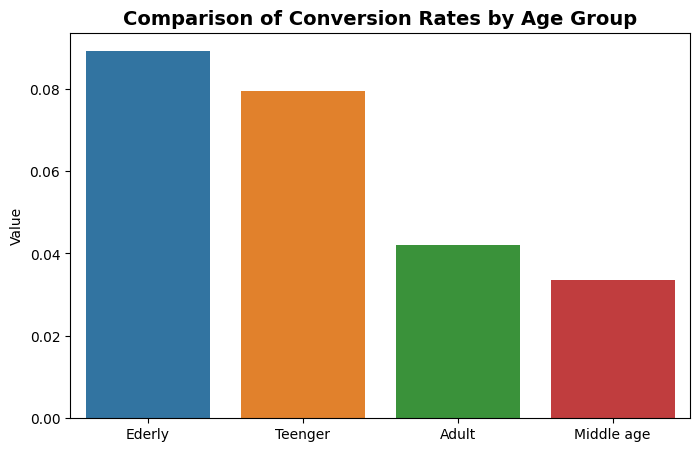

In [85]:
# menampilkan perbandingan antara convertion rate dengan group usia
convertion_rate = df_visit.groupby('Group_Age').agg({'Con_rate':'mean'}).reset_index().sort_values(by='Con_rate',ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='Group_Age',y='Con_rate',data= convertion_rate)
plt.xlabel(' ')
plt.ylabel('Value')
plt.title('Comparison of Conversion Rates by Age Group', fontsize='14', weight='bold')
plt.show()

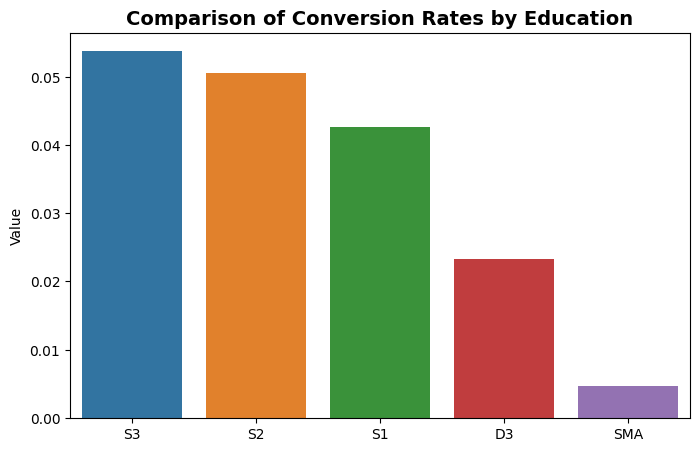

In [86]:
education_rate = df_visit.groupby('Education').agg({'Con_rate':'mean'}).reset_index().sort_values(by='Con_rate',ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='Education',y='Con_rate',data= education_rate)
plt.xlabel(' ')
plt.ylabel('Value')
plt.title('Comparison of Conversion Rates by Education', fontsize='14', weight='bold')
plt.show()

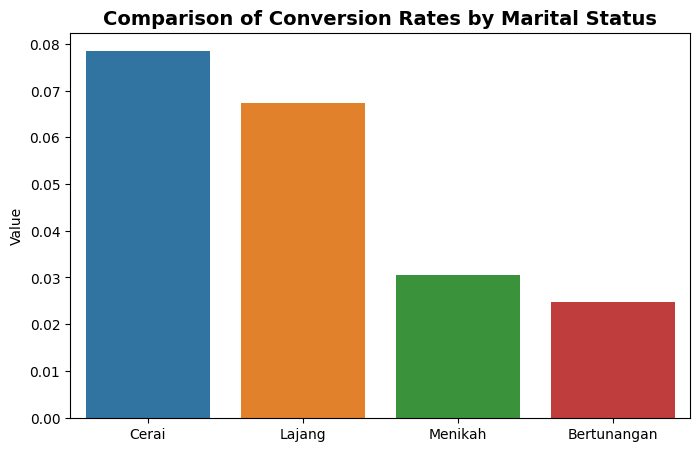

In [89]:
marital_rate = df_visit.groupby('Marital_Status').agg({'Con_rate':'mean'}).reset_index().sort_values(by='Con_rate',ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='Marital_Status',y='Con_rate',data= marital_rate)
plt.xlabel(' ')
plt.ylabel('Value')
plt.title('Comparison of Conversion Rates by Marital Status', fontsize='14', weight='bold')
plt.show()

Setelah dilakukan perbandingan antara Confusion rate antara kelompok usia, pendidikan, status pernikahan yang memiliki nilai confusion rate tinggi ada pada golongan lanjut usia yang memiliki pendidikan terakhir S3, dan berstatus Cerai.